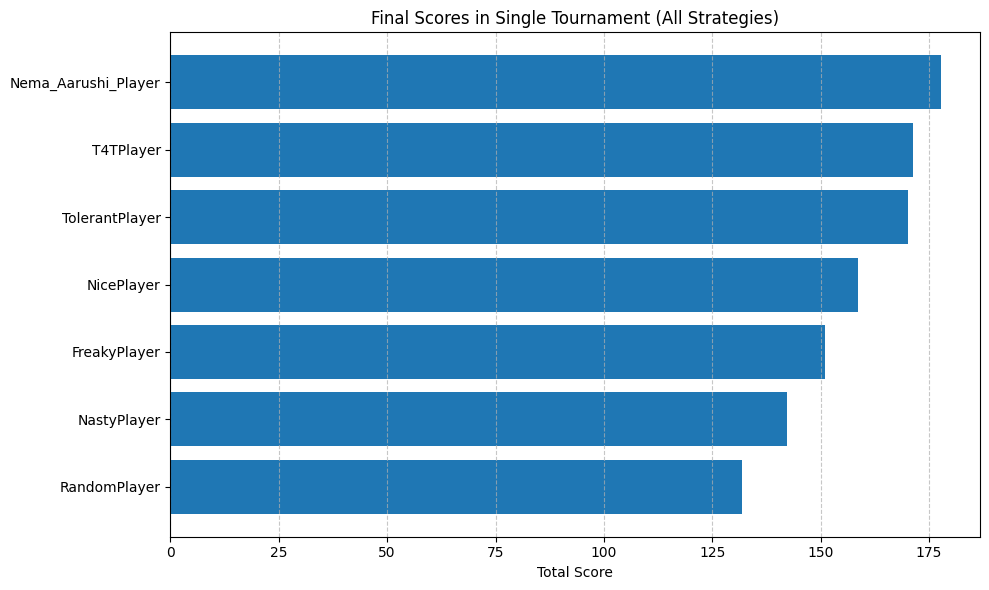

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Final tournament result scores extracted from the summary at the end of the file
data = {
    'Strategy': [
        'Nema_Aarushi_Player', 'T4TPlayer', 'TolerantPlayer',
        'NicePlayer', 'FreakyPlayer', 'NastyPlayer', 'RandomPlayer'
    ],
    'Score': [
        177.88, 171.36, 170.27,
        158.70, 151.07, 142.35, 131.91
    ]
}

df = pd.DataFrame(data)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['Strategy'], df['Score'])
plt.xlabel('Total Score')
plt.title('Final Scores in Single Tournament (All Strategies)')
plt.gca().invert_yaxis()  # Highest score on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Aarushi\AppData\Local\Temp\ipykernel_11888\3835624913.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=score_df, x='Average Score', y='Player', palette='viridis')


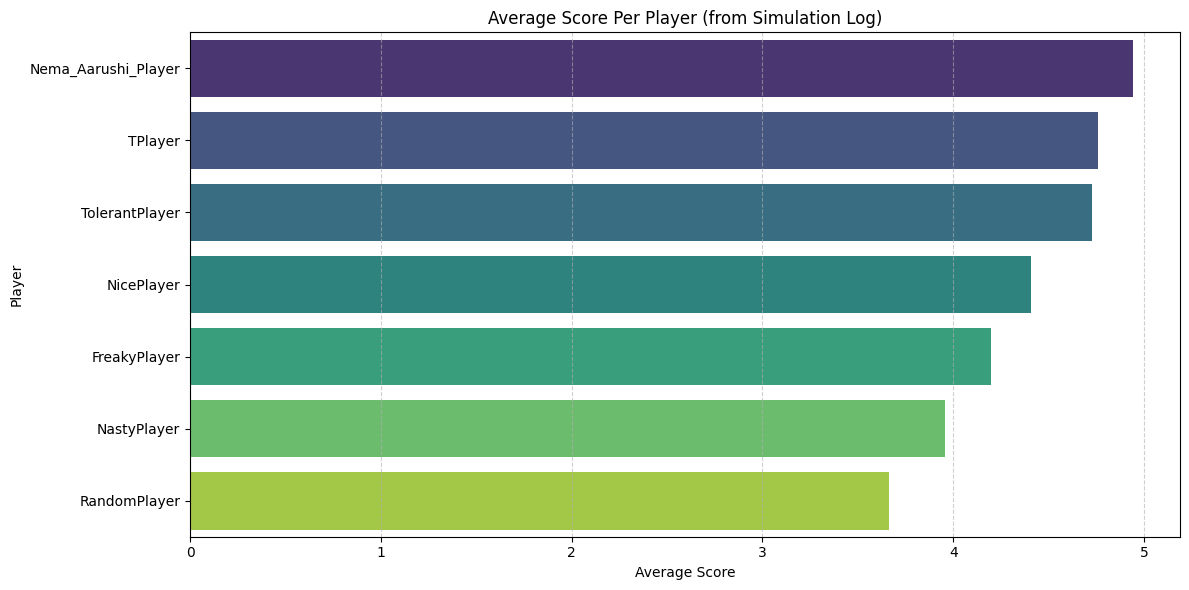

In [4]:
import re
from collections import defaultdict

# Sample parsing approach for the long log content to extract player names and scores
log_file_path = r"C:\Users\Aarushi\Desktop\SC4003_Intelligent_Agents\assignment 2\output\single_game_results.txt"
player_scores = defaultdict(list)

# Read the log file and parse lines
with open(log_file_path, "r") as file:
    for line in file:
        matches = re.findall(r'([A-Za-z_]+Player) scored ([0-9.]+)', line)
        for player, score in matches:
            player_scores[player].append(float(score))

# Create a DataFrame for average score per player based on extracted logs
score_data = {
    'Player': [],
    'Average Score': [],
    'Games Played': []
}

for player, scores in player_scores.items():
    score_data['Player'].append(player)
    score_data['Average Score'].append(sum(scores) / len(scores))
    score_data['Games Played'].append(len(scores))

score_df = pd.DataFrame(score_data)
score_df = score_df.sort_values(by='Average Score', ascending=False)

import seaborn as sns

# Plotting average score per player from parsed log
plt.figure(figsize=(12, 6))
sns.barplot(data=score_df, x='Average Score', y='Player', palette='viridis')
plt.title('Average Score Per Player (from Simulation Log)')
plt.xlabel('Average Score')
plt.ylabel('Player')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import ace_tools as tools

# Creating a summary table from the long strategy descriptions
data = [
    {
        "Agent Name": "ThresholdTolerancePlayer",
        "Description": "Cooperates until total opponent defections exceed a set threshold (e.g., 10), then defects permanently. Implements limited forgiveness with a hard cutoff.",
        "Average Score": "~721",
        "Relative Performance": "2nd place. Nearly tied with Nema; Nema edged ahead due to endgame tactics and refined forgiveness."
    },
    {
        "Agent Name": "UnforgivingPlayer",
        "Description": "Uses grim trigger: defects permanently after a single opponent defection. Cooperates flawlessly otherwise.",
        "Average Score": "~711",
        "Relative Performance": "3rd place. Strong in fully cooperative groups but punished when any defection occurs; lacks ability to recover cooperation like Nema."
    },
    {
        "Agent Name": "ReconciliationPlayer",
        "Description": "Defects after betrayal but returns to cooperation if both opponents cooperate for consecutive rounds. Balanced punishment and forgiveness.",
        "Average Score": "~708",
        "Relative Performance": "4th place. Performs well with forgiving strategies. Slightly below Nema due to lack of total betrayal cap."
    },
    {
        "Agent Name": "ConditionalReconciliationPlayer",
        "Description": "Forgives defections unless a total defection limit is exceeded; combines Reconciliation logic with a betrayal cap.",
        "Average Score": "~704–705",
        "Relative Performance": "5th–6th place. Matches simpler strategies like TolerantPlayer. Nema edges ahead due to better timing and endgame payoff optimization."
    },
    {
        "Agent Name": "ConsensusBasedPlayer",
        "Description": "Cooperates only if all players made the same move last round. Defects if any mismatch occurred.",
        "Average Score": "~671",
        "Relative Performance": "8th place. Too rigid in requiring unanimous cooperation. Misses opportunities Nema capitalizes on through selective forgiveness."
    },
    {
        "Agent Name": "PeacemakerPlayer",
        "Description": "Defects after a defection, then always cooperates next round to restore trust, regardless of opponent behavior.",
        "Average Score": "~665",
        "Relative Performance": "9th place. Vulnerable to exploitation due to predictable forgiveness. Nema punishes repeat offenders more reliably."
    },
    {
        "Agent Name": "FiniteCooperationPlayer",
        "Description": "Starts cooperatively but has a limited number of cooperative rounds. Defects once quota is used or upon any defection.",
        "Average Score": "~626",
        "Relative Performance": "10th place. Performs well early but collapses into defection later. Nema sustains cooperation better without artificial limits."
    },
    {
        "Agent Name": "DistrustfulMimicPlayer",
        "Description": "Defects first round, then mimics last round behavior: defects if anyone defected, cooperates only if both cooperated.",
        "Average Score": "~536",
        "Relative Performance": "13th place. Overly cautious and pessimistic; fails to initiate cooperation. Nema's cooperative start gives it the edge."
    },
    {
        "Agent Name": "PatternSwitchPlayer",
        "Description": "Follows a fixed alternate pattern of cooperate/defect regardless of context. Easily exploitable due to predictability.",
        "Average Score": "~449",
        "Relative Performance": "15th place. Second worst performer. Strategies like Nema exploit its pattern for easy gains."
    }
]

df = pd.DataFrame(data)
tools.display_dataframe_to_user(name="Agent Strategy Comparison Table", dataframe=df)


ModuleNotFoundError: No module named 'ace_tools'

In [6]:
!pip install ace-tools